# Exercises for linear regression

In [56]:
## importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt


## Exercise 0

,X,y
0,111.981955,275.072231
1,44.153139,77.065889
2,76.029467,113.972201
3,178.067407,312.163663
4,149.992261,333.291463
...,...,...
395,140.647083,328.981082
396,170.182502,379.965080
397,345.824737,755.863447
398,83.426708,143.661615


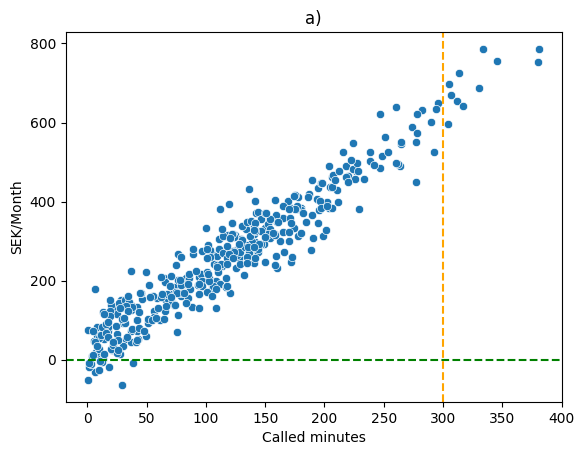

In [57]:
## a) 

seed =  42

# Generate simulated data
x = np.random.normal(100,100, 400)
x = np.absolute(x)
# Generate 
E = np.random.normal(0, 50, 400)

data = {"X" : x, "y": (x*2 + 25 + E)}
df  = pd.DataFrame(data)

display(df)
ax = sns.scatterplot(df, y="y", x="X")
ax.set(title="a)", ylabel="SEK/Month", xlabel="Called minutes")

ax = plt.axhline(0, color="green", linestyle= "dashed")
ax = plt.axvline(300, color="orange", linestyle= "dashed")

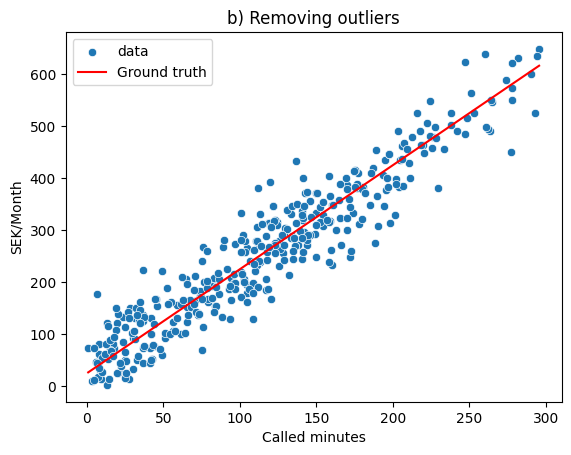

In [58]:
## b) 


## Dropping negative costs.
df.drop(df.loc[df["y"] < 0].index, inplace=True)

## Drop every call over 300 min
df.drop(df.loc[df["X"] > 300].index, inplace=True)

## Plot the new plot
ax = sns.scatterplot(df, x="X", y = "y", label="data")
ax.set(title="b) Removing outliers", ylabel="SEK/Month", xlabel="Called minutes")



## Calculate y_hat with given values for B1,B0
beta_0 = 25
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x
ax = sns.lineplot(df, x="X", y=y_hat(df["X"]), color="red", label="Ground truth")


In [59]:
## X = Minutes, Y = Cost in SEK/Month
df.head()
df["X"]

0      111.981955
1       44.153139
2       76.029467
3      178.067407
4      149.992261
          ...    
394    141.535432
395    140.647083
396    170.182502
398     83.426708
399    203.478948
Name: X, Length: 378, dtype: float64

##  1.  Train, test split


In [60]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction= 0.7, random_state=42, replace=False):
    
    X_train = X.sample(n=int(len(X)*train_fraction), random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)

    y_train = y.sample(n=int(len(y)*train_fraction), random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)


    return(X_train, X_test, y_train, y_test)
    

X_tr, X_te, y_tr, y_te = train_test_split(df["X"], df["y"])


print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)


(264,) (114,) (264,) (114,)


## 2. Simple linear regression with normal equation

31.68957740337029 1.9096906081170224 34.828719916185825 1.9186295649552394


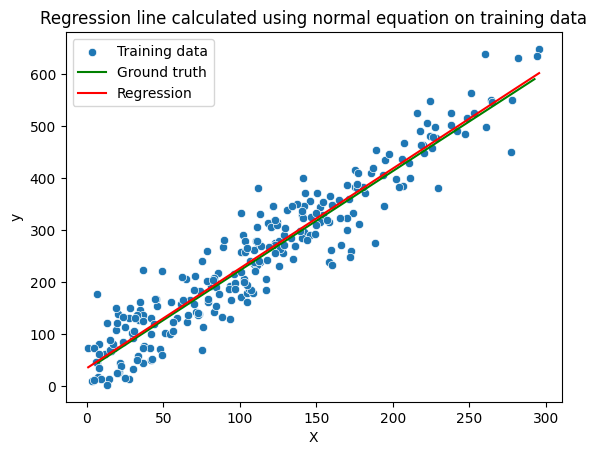

In [61]:
ax = sns.scatterplot(x=X_tr, y=y_tr, label="Training data")
ax.set_title("Regression line calculated using normal equation on training data")

beta_1, beta_0 = np.polyfit(X_te,y_te, deg=1)

def test_y_hat(x):
    return beta_0 + beta_1*x



## Ground truth with test data
ax = sns.lineplot(x=X_te, y=test_y_hat(X_te), color="green", label="Ground truth")


# Regression line with training data
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)

beta_1_tr, beta_0_tr  = np.polyfit(X_tr, y_tr, deg=1)

def beta_hat_tr(x):
    return beta_0_tr + beta_1_tr*x

ax = sns.lineplot(x=X_tr, y=beta_hat_tr(X_tr), color="Red", label="Regression")

print(beta_0, beta_1, beta_0_tr, beta_1_tr)

## 3. Prediction and evaluation

(37.02180152912824, 2191.502656223826, 46.81348797327353)

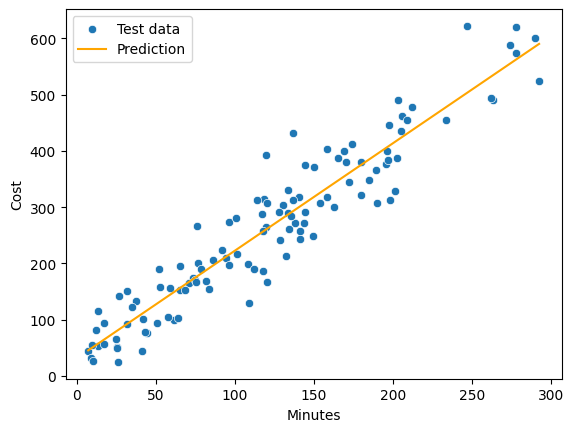

In [64]:
ax = sns.scatterplot(x=X_te, y=y_te, label="Test data")
y_pred = test_y_hat(X_te)

ax = sns.lineplot(x=X_te, y=y_pred, color="Orange", label="Prediction")
ax.set(ylabel="Cost", xlabel="Minutes")

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

## 4. More variables
Adding mean start cost(25kr), mean sms cost(50öre), surf/GB(50kr), per/minute(2kr)  

$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$

In [67]:
# Mean costs
start_cost = 25
cost_per_minute = 2 # x1
cost_per_text =  0.5 # x2
cost_per_gb = 50 # x3

x1 = np.random

""
